In [6]:
import os, sys
sys.path.insert(0, os.path.join(os.getcwd(), os.pardir))

import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator

# Импортируем логистическую регрессию
from utils import LogReg, plot_decision_function

%matplotlib inline

In [2]:
# Автоматически подгружаем обновления в пакетах
%load_ext autoreload
%autoreload 2

In [3]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

In [12]:
# Сгенерируем выборку для обучения логистической регрессии
N = 1000
X = np.random.uniform(-3, 3, size=(N, 2))
y = (2 * X[:, 0] - X[:, 1] + np.random.normal(scale=0.5, size=N) > 0).astype(int)
y_ = 2*(y-0.5)

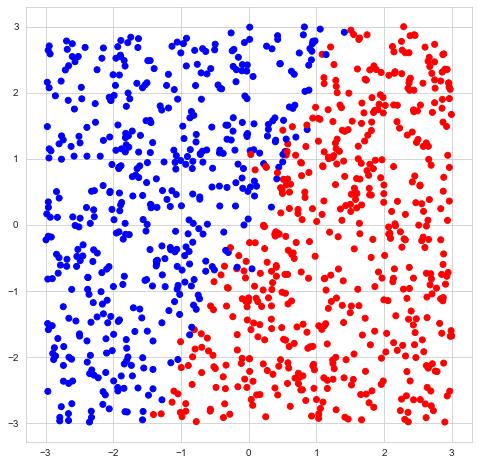

In [5]:
plt.figure(figsize=(8, 8));
plt.scatter(X[:, 0], X[:, 1], color=np.array(['blue', 'red'])[y]);

In [9]:
from scipy.special import expit

In [ ]:
x_dom 

In [11]:
class LogReg(BaseEstimator):
    def __init__(self):
        super().__init__()
        self.params = {}
        self.weights = None
        
    def _add_constant(self, X: np.ndarray):
        for col in range(X.shape[1]):
            unq_vals = np.unique(X[:, col])
            if len(unq_val) == 1 and unq_val[0] == 1:
                return X
        return np.hstack((np.ones(X.shape[0]).reshape(-1,1), X))
    
    def margin(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        return (-y.reshape(-1,1) * X @ self.weights).ravel()
    def compute_logloss(self, X: np.ndarray, y: np.ndarray, reg_coef: float) -> float:
        Q = np.mean(np.log(1+np.exp(-y.reshape(-1,1)*X@w).ravel()) + 
        ref_coef/2 * np.linalg.norm(self.weights)**2
        )
        
        return Q
    
    def compute_grad(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        grad = (
            -y.reshape(-1,1) * X * expit(-y*)
        )

In [6]:
log_reg = LogReg()

log_reg.fit(
    X=X, 
    y=y, 
    learning_rate=0.001, 
    max_iter=1000, 
    tol=1e-3, 
    fit_intercept=False, 
    reg_coef=0,
    criterion='grad',
    verbose=True
)
print(log_reg.fitted_weight)

epoch: 1, loss: 698.751, grad norm: 684.963
epoch: 2, loss: 355.704, grad norm: 335.282
epoch: 3, loss: 265.404, grad norm: 209.264
epoch: 4, loss: 228.145, grad norm: 150.459
epoch: 5, loss: 207.949, grad norm: 120.047
epoch: 6, loss: 194.666, grad norm: 102.256
epoch: 7, loss: 184.84, grad norm: 90.435
epoch: 8, loss: 177.065, grad norm: 81.772
epoch: 9, loss: 170.662, grad norm: 74.999
epoch: 10, loss: 165.248, grad norm: 69.479
epoch: 11, loss: 160.584, grad norm: 64.854
epoch: 12, loss: 156.508, grad norm: 60.903
epoch: 13, loss: 152.904, grad norm: 57.477
epoch: 14, loss: 149.688, grad norm: 54.472
epoch: 15, loss: 146.794, grad norm: 51.809
epoch: 16, loss: 144.172, grad norm: 49.431
epoch: 17, loss: 141.782, grad norm: 47.292
epoch: 18, loss: 139.592, grad norm: 45.356
epoch: 19, loss: 137.575, grad norm: 43.593
epoch: 20, loss: 135.71, grad norm: 41.981
epoch: 21, loss: 133.979, grad norm: 40.5
epoch: 22, loss: 132.366, grad norm: 39.133
epoch: 23, loss: 130.86, grad norm: 37.

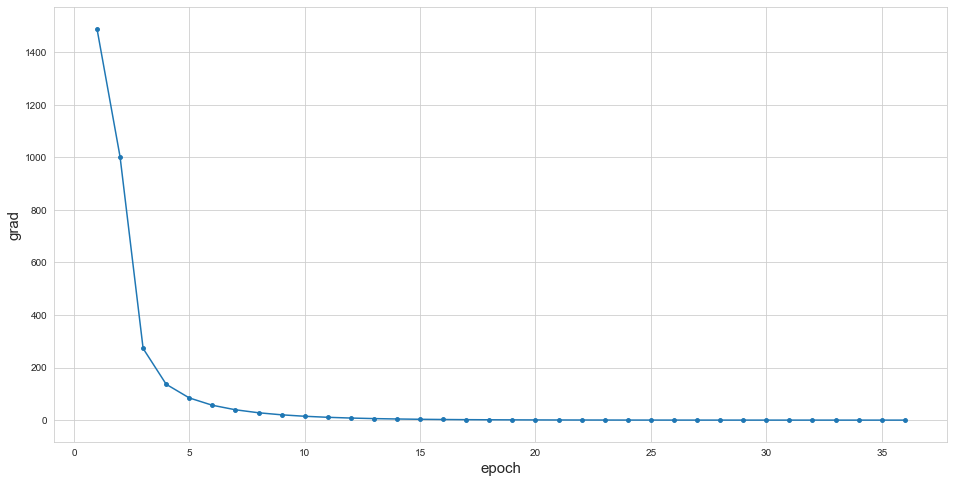

In [19]:
log_reg.plot_learning_progress(y_axis='grad')

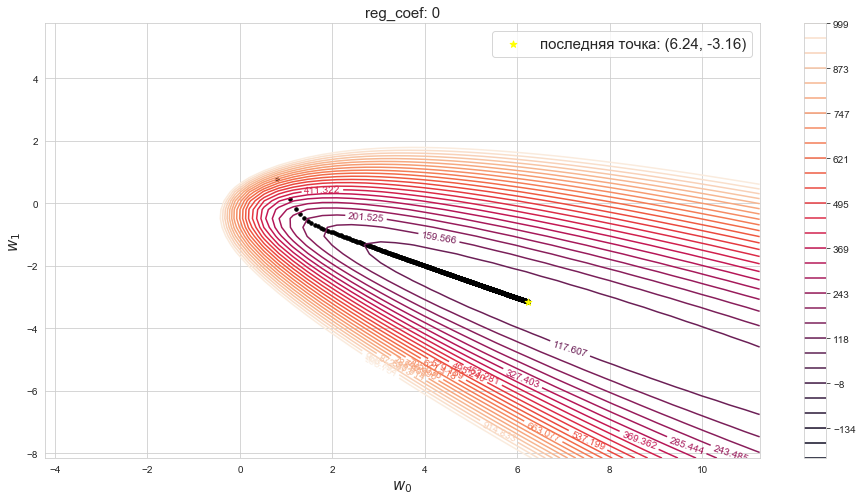

In [11]:
log_reg.plot2d_level_curves(
    X=X,
    y=y,
    figsize=(16, 8), n_levels=30,
#     track_every_k_points=30, 
    points_size=12, 
    text_size=15
)

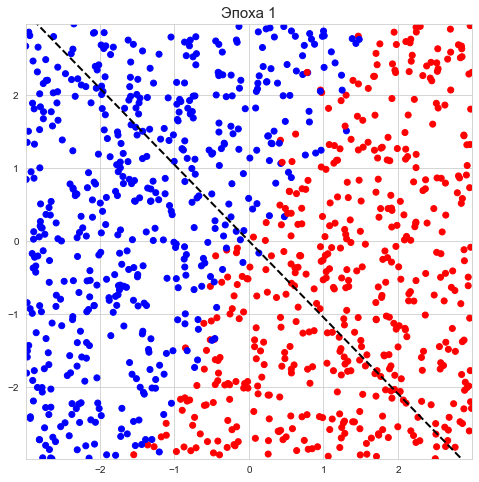

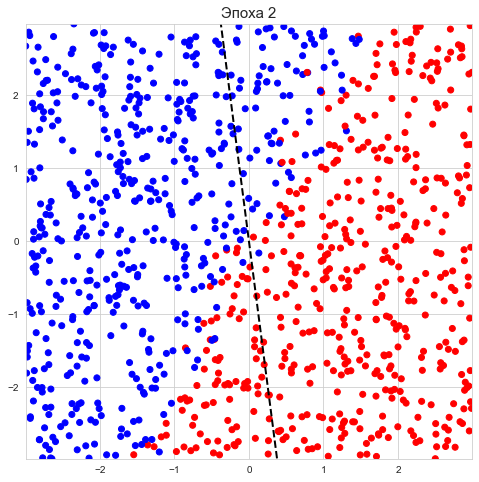

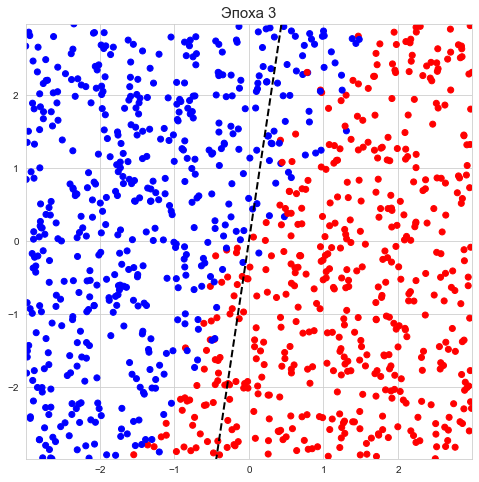

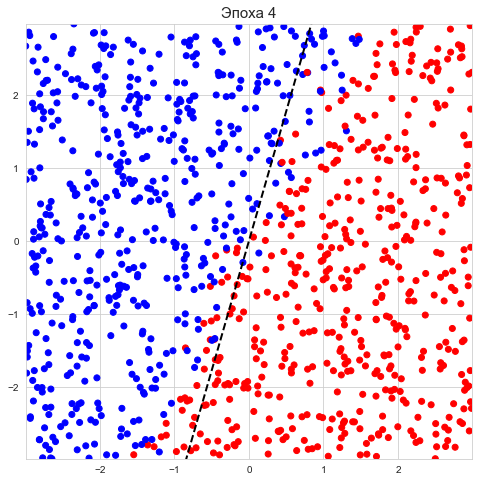

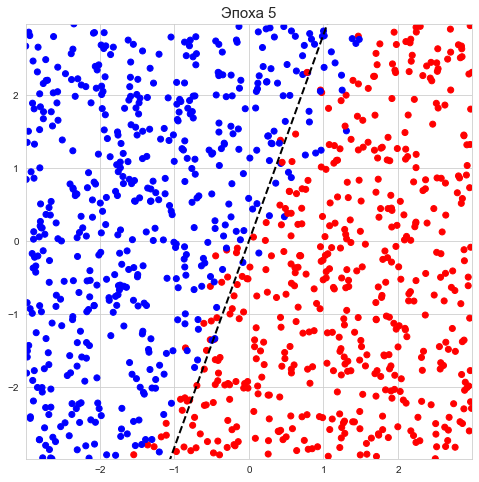

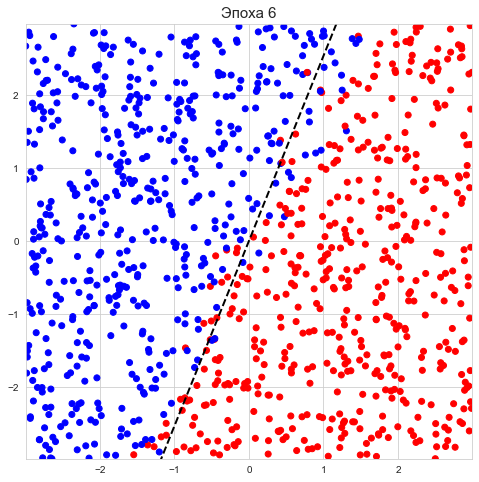

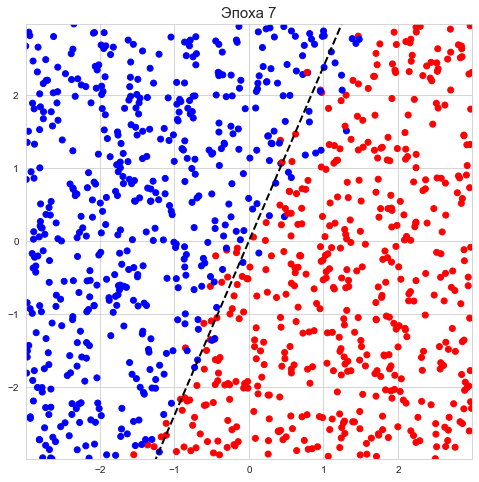

In [15]:
for epoch in range(1, min(log_reg.last_epoch, 7)+1):
    plot_decision_function(X, y, 
#     decision_function=lambda x: -log_reg.epochs_results['weights'][epoch][0]/log_reg.epochs_results['weights'][epoch][2]-(log_reg.epochs_results['weights'][epoch][1]/log_reg.epochs_results['weights'][epoch][2])*x,
    decision_function=lambda x: -(log_reg.epochs_results['weights'][epoch][0]/log_reg.epochs_results['weights'][epoch][1])*x,
    title=f'Эпоха {epoch}')


0.0001
Число эпох достигло max_iter!


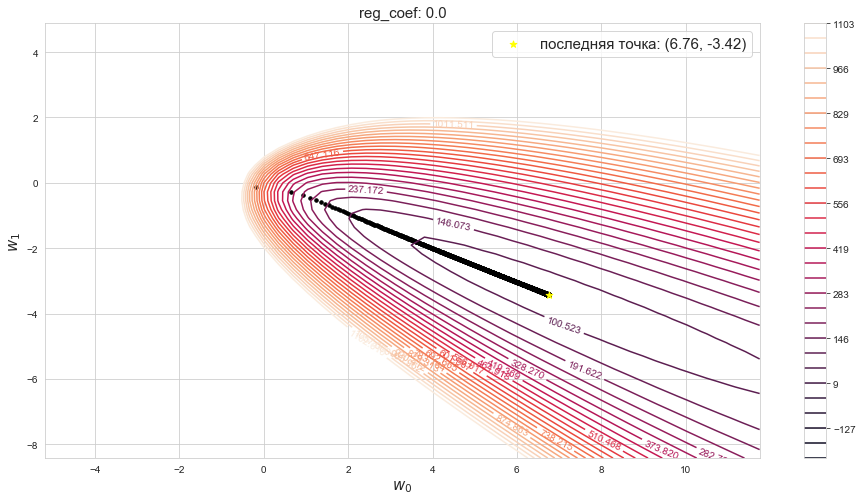

0.001
Число эпох достигло max_iter!


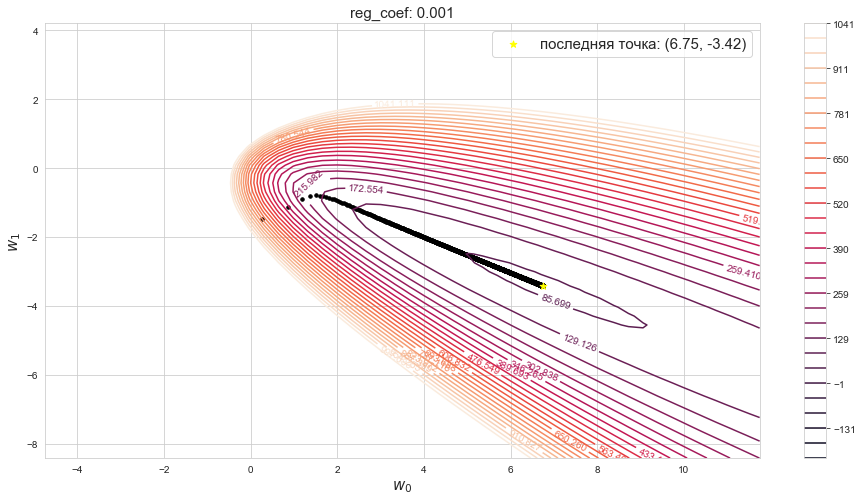

0.01
Достигнута требуемая точность


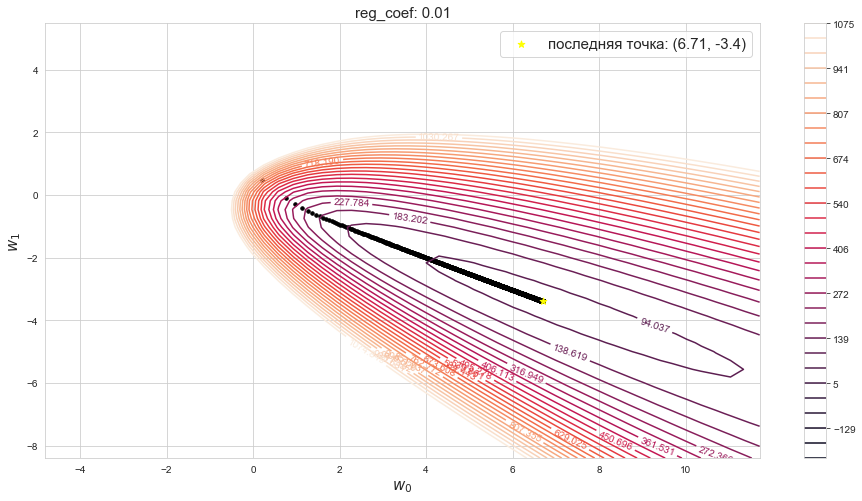

0.1
Достигнута требуемая точность


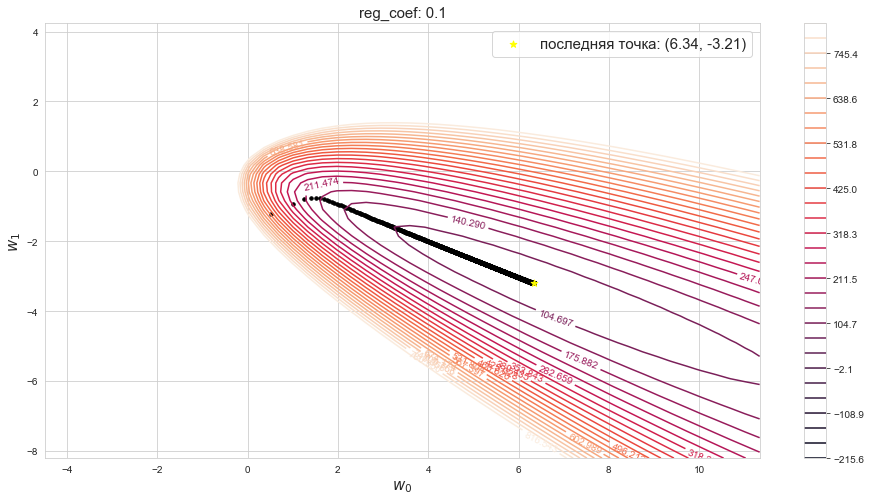

1.0
Достигнута требуемая точность


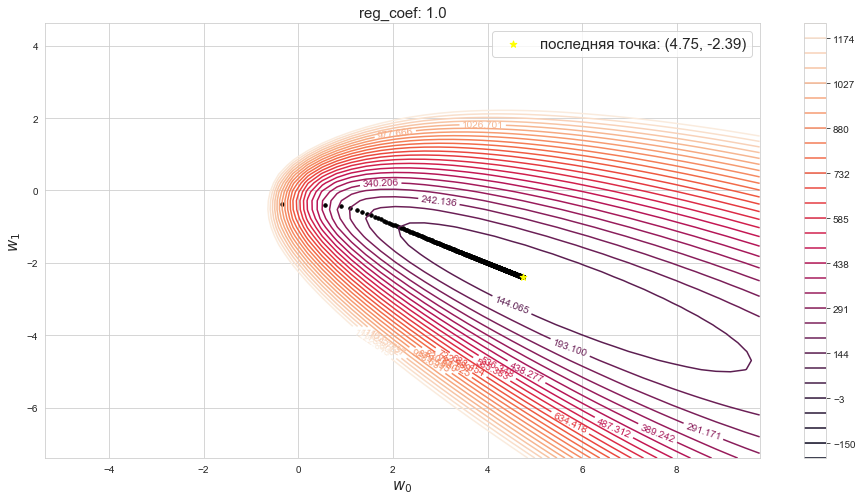

10.0
Достигнута требуемая точность


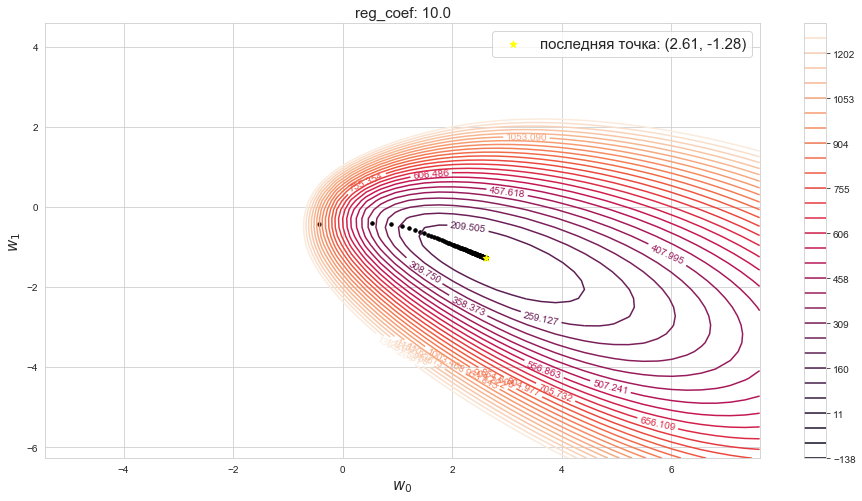

100.0
Достигнута требуемая точность


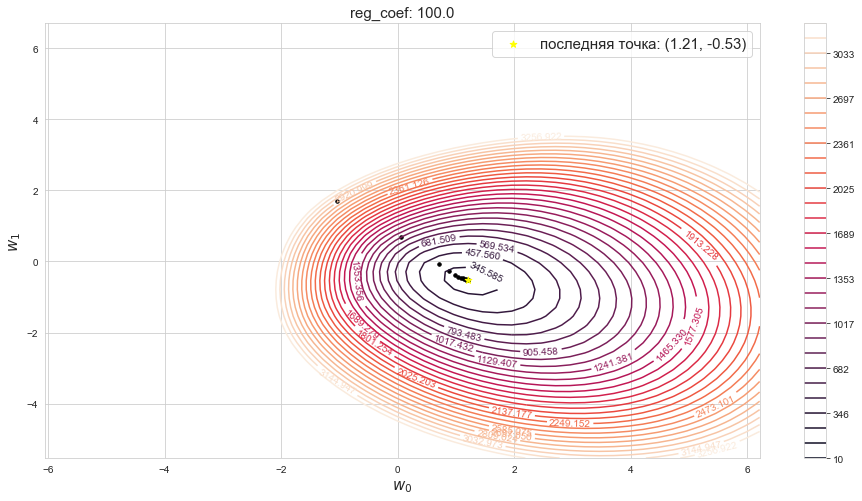

In [18]:
# Линии уровня лосса при различных значениях регуляризационного коэффициента
reg_coef = 1e-4
multiplicative_coef = 10
while reg_coef < 1000:
    print(reg_coef)
    log_reg = LogReg()
    log_reg.fit(
    X=X, 
    y=y, 
    learning_rate=0.001, 
    max_iter=4000, 
    tol=1e-2, 
    fit_intercept=False, 
    reg_coef=reg_coef,
    criterion='grad',
    verbose=False
    )
    log_reg.plot2d_level_curves(X=X, y=y, figsize=(16, 8), n_levels=30, 
#                             track_every_k_points=30, 
                            points_size=12, 
                            text_size=15)
    plt.show()
    reg_coef *= multiplicative_coef
    
